In [63]:
import pandas as pd

# Read JSON file into a pandas DataFrame
df = pd.read_json('loan_approval_dataset.json')

# Print the DataFrame
print(df)


            Id   Income  Age  Experience Married/Single House_Ownership  \
0            1  1303834   23           3         single          rented   
1            2  7574516   40          10         single          rented   
2            3  3991815   66           4        married          rented   
3            4  6256451   41           2         single          rented   
4            5  5768871   47          11         single          rented   
...        ...      ...  ...         ...            ...             ...   
251995  251996  8154883   43          13         single          rented   
251996  251997  2843572   26          10         single          rented   
251997  251998  4522448   46           7         single          rented   
251998  251999  6507128   45           0         single          rented   
251999  252000  9070230   70          17         single          rented   

       Car_Ownership           Profession                 CITY  \
0                 no  Mechanical_

In [64]:
#Check toal datset and total missing value of each column
print(len(df))
print(df.isnull().sum())

252000
Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64


In [65]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Married/Single'] = label_encoder.fit_transform(df['Married/Single'])
df['House_Ownership'] = label_encoder.fit_transform(df['House_Ownership'])
df['Car_Ownership'] = label_encoder.fit_transform(df['Car_Ownership'])
df['CITY'] = label_encoder.fit_transform(df['CITY'])
df['Profession'] = label_encoder.fit_transform(df['Profession'])
df['STATE'] = label_encoder.fit_transform(df['STATE'])


print(df.head())

   Id   Income  Age  Experience  Married/Single  House_Ownership  \
0   1  1303834   23           3               1                2   
1   2  7574516   40          10               1                2   
2   3  3991815   66           4               0                2   
3   4  6256451   41           2               1                2   
4   5  5768871   47          11               1                2   

   Car_Ownership  Profession  CITY  STATE  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  \
0              0          33   251     13                3                 13   
1              0          43   227     14                9                 13   
2              0          47     8     12                4                 10   
3              1          43    54     17                2                 12   
4              0          11   296     22                3                 14   

   Risk_Flag  
0          0  
1          0  
2          0  
3          1  
4          1  


In [66]:
print(len(df))

df=df.drop_duplicates()
print(df)

252000
            Id   Income  Age  Experience  Married/Single  House_Ownership  \
0            1  1303834   23           3               1                2   
1            2  7574516   40          10               1                2   
2            3  3991815   66           4               0                2   
3            4  6256451   41           2               1                2   
4            5  5768871   47          11               1                2   
...        ...      ...  ...         ...             ...              ...   
251995  251996  8154883   43          13               1                2   
251996  251997  2843572   26          10               1                2   
251997  251998  4522448   46           7               1                2   
251998  251999  6507128   45           0               1                2   
251999  252000  9070230   70          17               1                2   

        Car_Ownership  Profession  CITY  STATE  CURRENT_JOB_YRS  \
0

In [67]:
###Chi-Square TEST

from sklearn.feature_selection import SelectKBest, chi2
# Separate features (X) and target variable (y)
X1 = df.drop(['Id','Risk_Flag'], axis=1)
y1 = df['Risk_Flag']

# Step 2: Calculate chi-square statistics and p-values for each feature
chi2_selector = SelectKBest(chi2, k=5)
chi2_selector.fit(X1, y1)

# Step 3: Get p-values and selected features
p_values = chi2_selector.pvalues_
selected_features = X1.columns[p_values < 0.001]


# Print p-values and selected features
print("P-values:", p_values)
print("Selected features:", selected_features)

P-values: [0.00000000e+000 5.85465987e-154 2.34423104e-235 7.16754740e-004
 7.28320323e-004 6.53506937e-024 5.77141694e-013 1.26679380e-063
 1.66119991e-005 6.70613273e-035 3.75025530e-001]
Selected features: Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS'],
      dtype='object')


In [68]:
b=df[list(selected_features)+['Risk_Flag']]
print(len(selected_features))

10


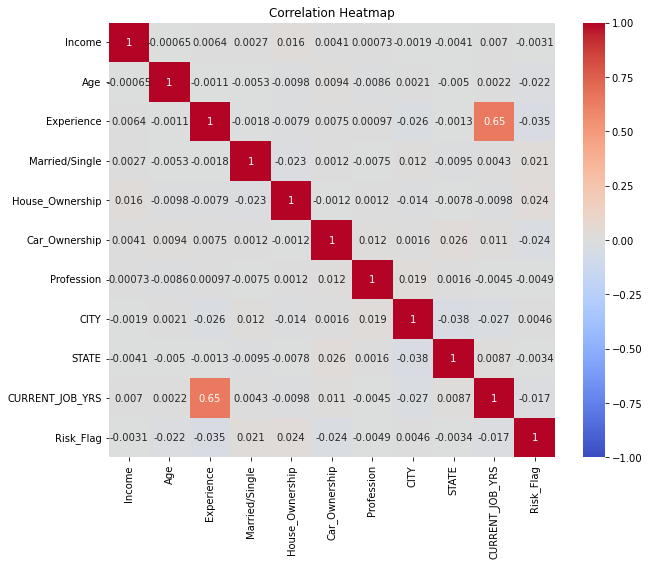

In [69]:
###HEAT MAP

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = b.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Add title and labels
plt.title('Correlation Heatmap')
plt.show()

In [70]:
# b.info()
print(b.describe())

             Income            Age     Experience  Married/Single  \
count  2.520000e+05  252000.000000  252000.000000   252000.000000   
mean   4.997117e+06      49.954071      10.084437        0.897905   
std    2.878311e+06      17.063855       6.002590        0.302774   
min    1.031000e+04      21.000000       0.000000        0.000000   
25%    2.503015e+06      35.000000       5.000000        1.000000   
50%    5.000694e+06      50.000000      10.000000        1.000000   
75%    7.477502e+06      65.000000      15.000000        1.000000   
max    9.999938e+06      79.000000      20.000000        1.000000   

       House_Ownership  Car_Ownership     Profession           CITY  \
count    252000.000000  252000.000000  252000.000000  252000.000000   
mean          1.891722       0.301587      25.276746     158.137675   
std           0.391880       0.458948      14.728537      92.201736   
min           0.000000       0.000000       0.000000       0.000000   
25%           2.000000 

In [71]:
from sklearn.model_selection import train_test_split
X = b.drop(['Risk_Flag'], axis=1)

import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA

pca = PCA(n_components=5)  # Choose the number of components you want to keep
X = pca.fit_transform(X)

# Print the explained variance ratio to understand the variance captured by each component
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("PCA Components:\n", X)

y = b['Risk_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

Explained variance ratio: [9.99999999e-01 1.02615641e-09 3.51540209e-11 2.61674599e-11
 1.05867205e-11]
PCA Components:
 [[-3.69328267e+06 -9.26657933e+01 -2.72073043e+01 -6.66082178e+00
  -6.17325372e-01]
 [ 2.57739933e+06 -6.90669221e+01 -1.04764181e+01 -1.72015501e+01
   4.23636846e-01]
 [-1.00530167e+06  1.50103876e+02  1.54620353e+01 -2.26423712e+01
  -2.39879957e+00]
 ...
 [-4.74668665e+05  1.41900886e+01 -3.70853561e+00  8.34479778e+00
   1.40223167e-01]
 [ 1.51001133e+06 -7.49647877e+01 -5.03609161e+00 -1.35093462e+00
   4.47553275e+00]
 [ 4.07311333e+06  1.31863968e+02  1.95184132e+01 -1.97127780e+01
   7.75205869e+00]]


Epoch: 1/20, Loss: 0.6669921278953552
Epoch: 2/20, Loss: 0.45501527190208435
Epoch: 3/20, Loss: 0.4070603549480438
Epoch: 4/20, Loss: 0.43705785274505615
Epoch: 5/20, Loss: 0.39083701372146606
Epoch: 6/20, Loss: 0.38080087304115295
Epoch: 7/20, Loss: 0.39649027585983276
Epoch: 8/20, Loss: 0.39999401569366455
Epoch: 9/20, Loss: 0.38974353671073914
Epoch: 10/20, Loss: 0.3786625862121582
Epoch: 11/20, Loss: 0.3784085214138031
Epoch: 12/20, Loss: 0.3863685131072998
Epoch: 13/20, Loss: 0.38938120007514954
Epoch: 14/20, Loss: 0.38378095626831055
Epoch: 15/20, Loss: 0.3773059844970703
Epoch: 16/20, Loss: 0.37641802430152893
Epoch: 17/20, Loss: 0.3797542452812195
Epoch: 18/20, Loss: 0.38228538632392883
Epoch: 19/20, Loss: 0.38133519887924194
Epoch: 20/20, Loss: 0.378007709980011


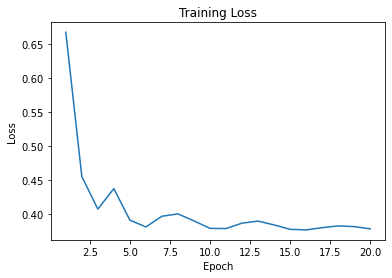

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     66379
           1       1.00      0.00      0.00      9221

    accuracy                           0.88     75600
   macro avg       0.94      0.50      0.47     75600
weighted avg       0.89      0.88      0.82     75600

Accuracy: 0.8780291005291005
Confusion Matrix:
[[66379     0]
 [ 9221     0]]


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


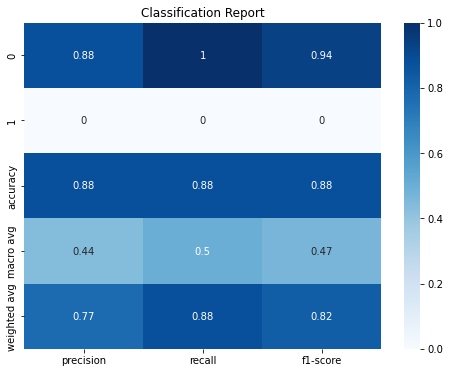

In [72]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_tensor = torch.Tensor(X_train_scaled)
X_test_tensor = torch.Tensor(X_test_scaled)
y_train_tensor = torch.LongTensor(y_train.values)
y_test_tensor = torch.LongTensor(y_test.values)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X_train_tensor.shape[1], 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc5 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, len(y.unique()))

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        # x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = self.fc3(x)
        return x

model = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
losses = []

# Train the model
num_epochs = 20
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()
    print(f"Epoch: {epoch+1}/{num_epochs}, Loss: {loss.item()}")

# Plotting the loss
plt.plot(range(1, num_epochs+1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs.data, 1)
    y_test_labels = y.unique()[y_test_tensor]
    predicted_labels = y.unique()[predicted]
    
    print(classification_report(y_test_labels, predicted_labels, zero_division=1))

    accuracy = accuracy_score(y_test_labels, predicted_labels)
    confusion = confusion_matrix(y_test_labels, predicted_labels)
    print("Accuracy:", accuracy)
    print("Confusion Matrix:")
    print(confusion)

report_df = pd.DataFrame.from_dict(classification_report(y_test_labels, predicted_labels, output_dict=True))
report_df = report_df.iloc[:-1, :].T

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(report_df, annot=True, cmap='Blues', ax=ax)
ax.set_title('Classification Report')
plt.show()
